<a href="https://colab.research.google.com/github/GuhankarthickC/Conversation-Engine-For-Deaf-and-Dumb/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from tensorflow.keras import models

In [2]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale = 1./255)
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
x_train = train_datagen.flow_from_directory('gdrive/My Drive/training_set/', target_size=(64,64), batch_size=300, class_mode='categorical',  color_mode = "grayscale")

Found 15759 images belonging to 9 classes.


In [4]:
x_train.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

In [5]:
x_test = test_datagen.flow_from_directory('gdrive/My Drive/test_set/', target_size=(64,64), batch_size=300, class_mode='categorical',  color_mode = "grayscale")

Found 1310 images belonging to 9 classes.


In [6]:
model = Sequential()

In [7]:
model.add(Convolution2D(32, (3,3), input_shape=(64,64,1), activation = 'relu'))
#no. of feature detectors, size of featuredetector, image size, activation function

In [8]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [9]:
model.add(Dropout(0.25))

In [10]:
model.add(Convolution2D(64, (3,3), input_shape=(64,64,1), activation = 'relu'))
#no. of feature detectors, size of featuredetector, image size, activation function

In [11]:

model.add(MaxPooling2D(pool_size=(2,2)))

In [12]:
model.add(Dropout(0.25))

In [13]:
model.add(Convolution2D(128, (3,3), input_shape=(64,64,1), activation = 'relu'))
#no. of feature detectors, size of featuredetector, image size, activation function

In [14]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [15]:
model.add(Dropout(0.25))

In [16]:
model.add(Flatten())

In [17]:
model.add(Dense(units=512, activation='relu'))

In [18]:
model.add(Dense(units=9, activation='softmax'))

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
model.fit(x_train, steps_per_epoch=24, epochs=3, validation_data=x_test, validation_steps=40)

#steps_per_epoch = no. of train images//batch size

Epoch 1/3
24/24 [==============================] - 4674s 196s/step - loss: 1.6790 - accuracy: 0.4079 - val_loss: 0.6903 - val_accuracy: 0.8573
Epoch 2/3
24/24 [==============================] - 2067s 86s/step - loss: 0.3125 - accuracy: 0.9073
Epoch 3/3
24/24 [==============================] - 1081s 45s/step - loss: 0.1249 - accuracy: 0.9579


In [21]:
model.save('aslpng1.h5')

In [22]:
from keras.models import load_model
import numpy as np
import cv2

In [23]:
from keras.models import load_model
model=load_model('aslpng1.h5')

In [24]:
from skimage.transform import resize
def detect(frame):
        img = resize(frame,(64,64,1))
        img = np.expand_dims(img,axis=0)
        if(np.max(img)>1):
            img = img/255.0
        prediction = model.predict(img)
        print(prediction)
        prediction = model.predict_classes(img)
        print(prediction)

[[7.1239457e-03 5.0207583e-04 1.3793156e-05 1.9523341e-08 9.9226004e-01
  8.0711476e-07 1.9624451e-07 5.1811492e-07 9.8692486e-05]]
[4]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


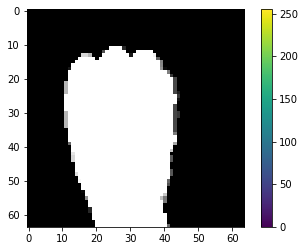

In [40]:
frame=cv2.imread(r"gdrive/My Drive/test_set/E/1.png")
data = detect(frame)
plt.figure()
plt.imshow(frame)
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
import numpy as np
import cv2
import os
from keras.models import load_model
from flask import Flask, render_template, Response
import tensorflow as tf
from gtts import gTTS #to convert text to speech
global graph
global writer
from skimage.transform import resize

In [ ]:
graph = tf.Graph()
writer = None

model = load_model('aslpng1.h5')

vals = ['A', 'B','C','D','E','F','G','H','I']

app = Flask(__name__)

print("[INFO] accessing video stream...")
vs = cv2.VideoCapture(0) #triggers the local camera

pred=""


[INFO] accessing video stream...


In [ ]:
def detect(frame):
        img = resize(frame,(64,64,1))
        img = np.expand_dims(img,axis=0)
        if(np.max(img)>1):
            img = img/255.0
        with graph.as_default():
                prediction = model.predict_classes(img)
        print(prediction)
        pred=vals[prediction[0]]
        print(pred)
        return pred


In [ ]:
@app.route('/')
def index():
    return render_template('index.html')


In [ ]:
def gen():
        while True:
            # read the next frame from the file
            (grabbed, frame) = vs.read()
            
            # if the frame was not grabbed, then we have reached the end
            # of the stream
            if not grabbed:
                break
            
            data = detect(frame)
            # output frame
            text = "It indicates "+data
            cv2.putText(frame, text, (10, frame.shape[0] - 25),cv2.FONT_HERSHEY_SIMPLEX, 0.85, (0, 0, 255), 4)
            cv2.imwrite("1.jpg",frame)

            #converts text to speech and plays the audio
            speech = gTTS(text = data, lang = 'en', slow = False)
            speech.save("text.mp3")
            os.system("start text.mp3")
            
            key = cv2.waitKey(1) & 0xFF
            # if the `q` key was pressed, break from the loop
            if key == ord("q"):
                break
            fourcc = cv2.VideoWriter_fourcc(*"MJPG")
            writer = cv2.VideoWriter(r"output.avi", fourcc, 25,(frame.shape[1], frame.shape[0]), True)

            (flag, encodedImage) = cv2.imencode(".jpg", frame)
            yield (b'--frame\r\n' b'Content-Type: image/jpeg\r\n\r\n' + 
                                bytearray(encodedImage) + b'\r\n')

In [ ]:
@app.route('/video_feed')
def video_feed():
    return Response(gen(),
                    mimetype='multipart/x-mixed-replace; boundary=frame')

if __name__ == '__main__':
    app.run(host='0.0.0.0', debug=True)

AssertionError: ignored